# MS deconvolution for catalytic thermal decomposition of polyethylene

This notebook deconvolutes continuous scan MS data of catalytic thermal decomposition of polyethylene in 0–210 m/z region. To deconvolute your spectrum, specify a path to the MS data file and change script parameters in the code cell, and re-run the whole notebook.

## Preparing data

Short description of script parameters:
- **path**: path to MS data file;
- **temps**: a tuple of two numbers, start and finish temperatures, arbitrary units. If *None*, scan indexes will be used for plotting;
- **times**: a tuple of two numbers, corresponding to the start of heating and the end of the experiment, arbitrary units. Zero time is considered the start of the experiment. The heating rate is assumed to be constant;
- **max_mz**: largest m/z value used to plot the heatmap;
- **min_intensity**: lower MS intensities will be reduced to this value. Increasing this parameter will increase the white area of the heatmap;
- **show_alkanes**: adds vertical dotted lines corresponding to the molecular ions of saturated hydrocarbons;
- **step_size**: each *step_size*-th scan is used for deconvolution. Calculation with *step_size = 1* will take tens of minutes;
- **min_percentage**: the minimum amount of a substance to be shown in the output, %.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from functions.composition_analysis import read_ms_data, get_ms_basis, deconvolute_ms, get_main_compounds
from functions.visualization import plot_ms_heatmap, plot_fraction_types, plot_main_compounds, print_main_compounds

# read mass spectre
path = 'examples/inputs/PE_BETA'
temps = (300, 600)
times = (20, 300)
df = read_ms_data(path, temps, times)

# heatmap parameters
max_mz = 250
min_intensity = 100
show_alkanes = True

# deconvolution parameters
step_size = 50
min_percentage = 0.1
use_masses = False
basis = get_ms_basis('basis/csvs/basis.csv')

## MS heatmap

Heatmap of continuous scan MS. The horizontal axis represents the m/z ratio, and a vertical one is a scan number or temperature if specified in input parameters. The plot above the heat map is the total intensity of each peak across all MS scans. The plot to the right of the heatmap represents the total intensity of all peaks of each scan and can be considered as the DTG curve.

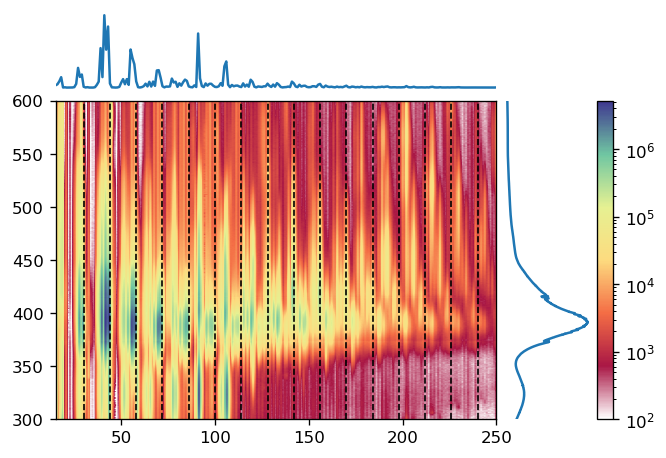

In [2]:
fig = plot_ms_heatmap(df, max_mz = max_mz, min_intensity = min_intensity,
                      show_alkanes = show_alkanes)

## Main fractions

Dependence of the amount of main product type (*alkanes*, *alkenes*, *polyenes*, and *aromatics*) on the scan number or temperature. These dependencies and total amounts can be considered as semi-quantitative and can be compared with other systems.

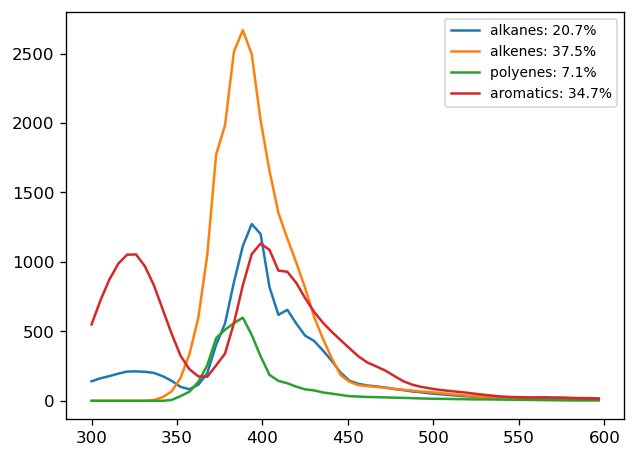

In [3]:
fracs, ftypes = deconvolute_ms(df, basis, step_size = step_size)
fig = plot_fraction_types(ftypes, df.temp, step_size = step_size)

## Main compounds

### Tabular format

**Please keep in mind that these numbers** are obtained as a result of the qualitative procedure and **may deviate significantly from reality.** Moreover, the mixture may contain significant amounts of substances not listed in this table. However, this data can still be used to extract useful information, such as mean molecular weight for each fraction or branching degree.

In [4]:
quantities = get_main_compounds(fracs, basis, min_percentage = min_percentage,
                                print_data = True)

                                  name  percentage
0                   Benzene, dimethyl-       14.04
1                 1-Heptene, 6-methyl-        4.96
2                              Pentane        4.68
3                            Isobutene        4.30
4                            1-Pentene        3.50
5                             3-Hexene        3.34
6                        1-Tetradecene        3.11
7                          1-Tridecene        3.04
8                Butane, 2,3-dimethyl-        2.76
9                              Propene        2.64
10                   Hexane, 2-methyl-        2.55
11        1,4-Hexadiene, 2,3-dimethyl-        2.31
12              Benzene, ethyl-methyl-        2.27
13               Hexane, 3,3-dimethyl-        2.10
14               Benzene, tetramethyl-        1.94
15                    Benzene, methyl-        1.75
16                     Benzene, ethyl-        1.66
17                1-Pentene, 4-methyl-        1.64
18       Hexane, 2-methyl-4-met

### Release of main compounds

Dependence of the amount of substance in decomposition products on the scan number or temperature. There are four graphs for different types of products: *alkanes*, *alkenes*, *polyenes*, and *aromatics*.

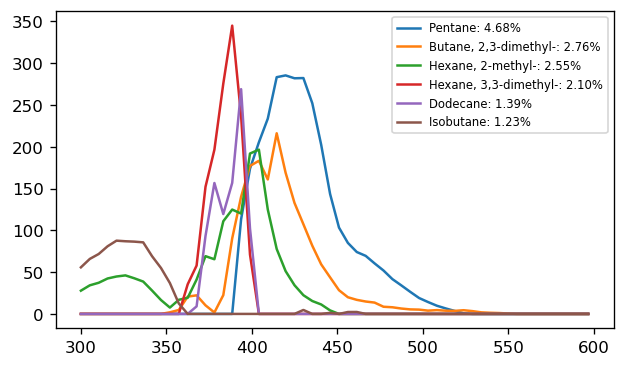

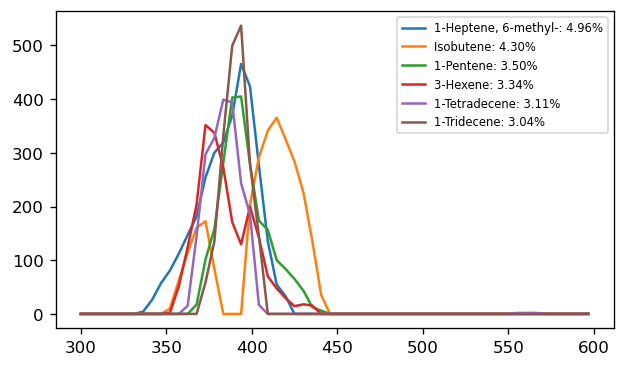

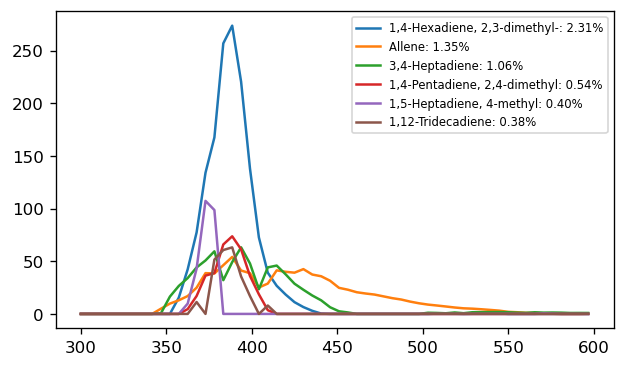

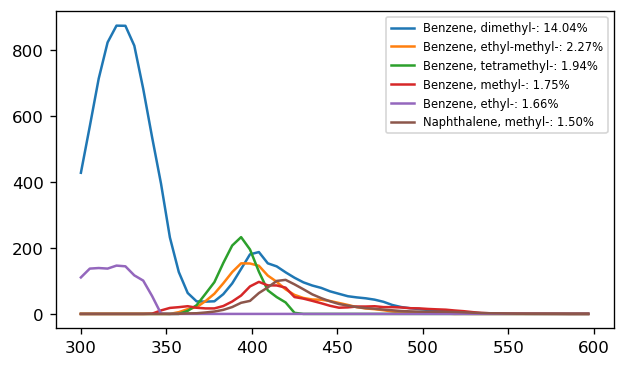

In [5]:
figs = plot_main_compounds(quantities, fracs, basis, df.temp,
                           step_size = step_size)

### Structures of main compounds

Please keep in mind that substituents in aromatic compounds can occupy any position.

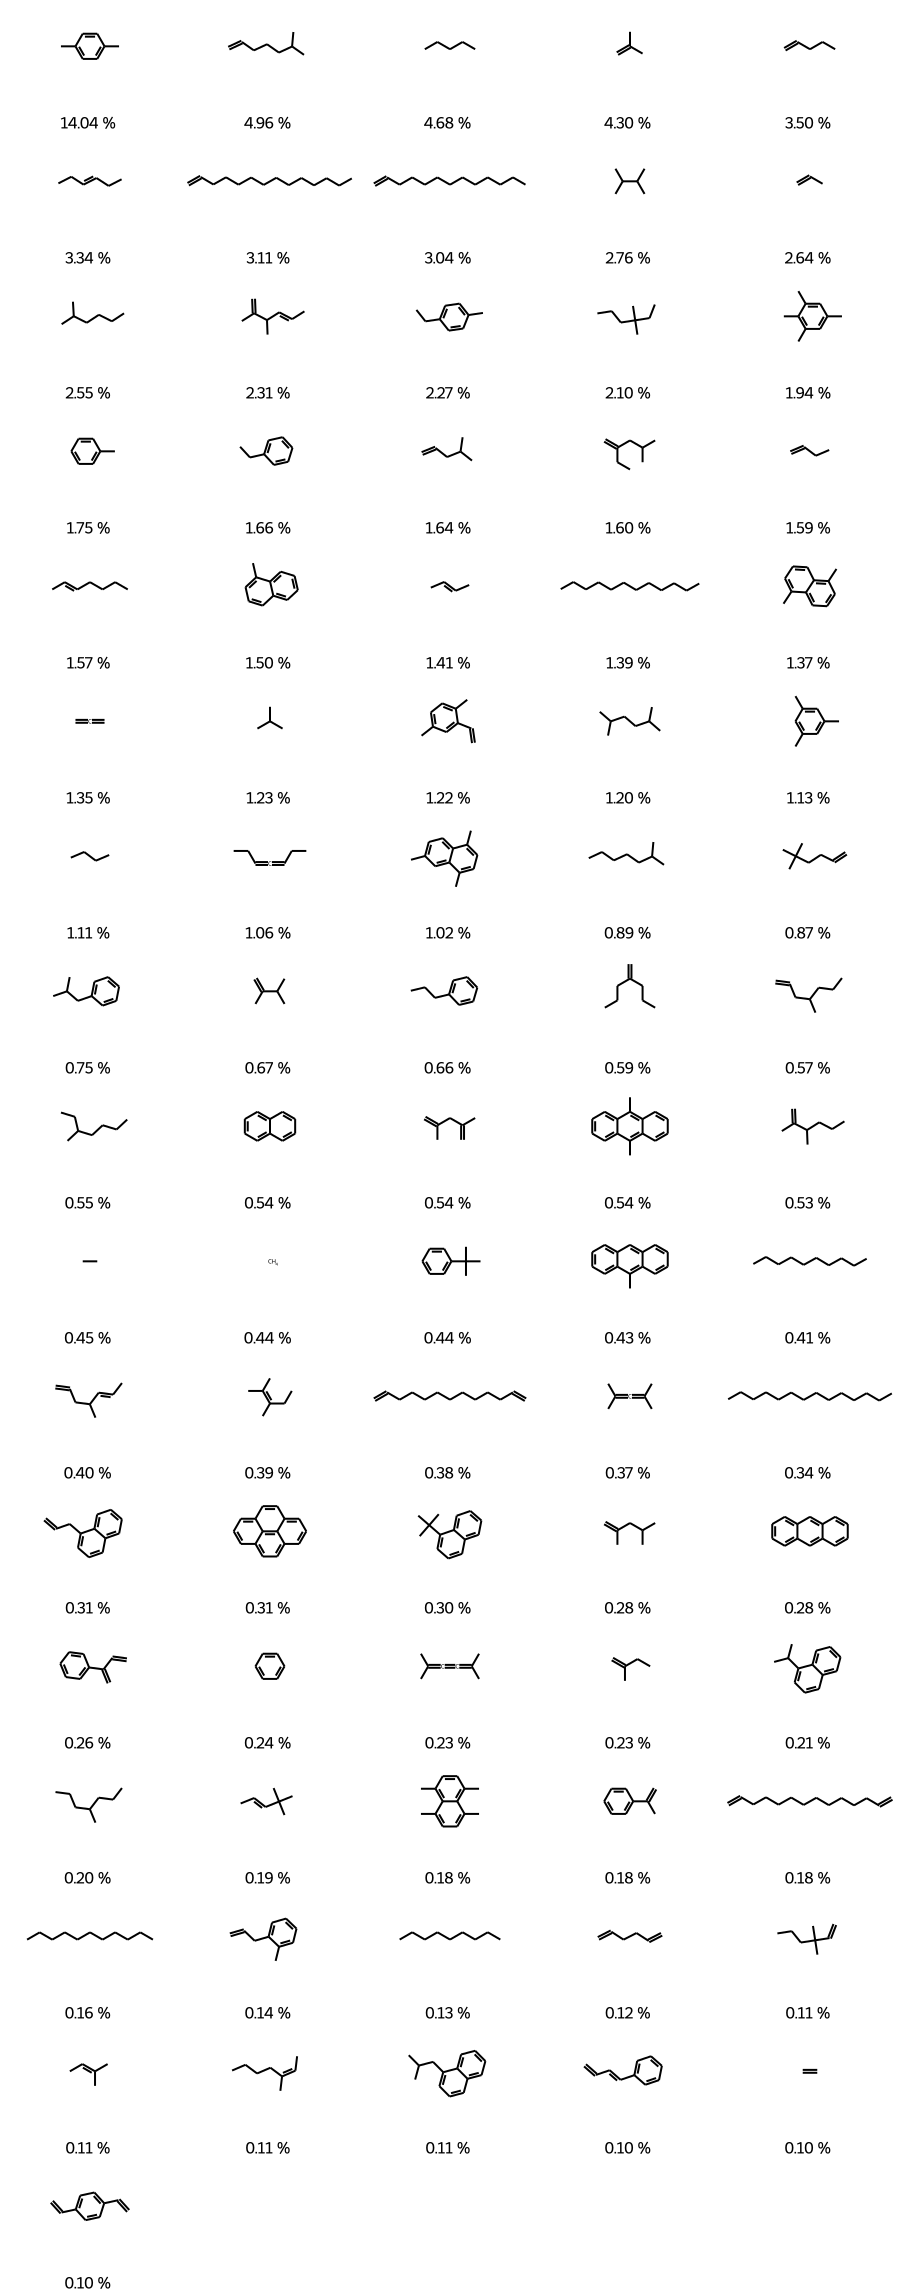

In [6]:
print_main_compounds(quantities, basis)